In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline

## Load Dataset

In [33]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [ i.replace(' (cm)', '') for i in df.columns]
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Scale Data

## MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(df)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Standardization (Z-Score Normalization)

using library StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling.fit_transform(df)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Using formula

In [36]:
for col in df.columns:
    avg = df[col].mean()
    sd =  df[col].std()
    df[col] = df[col].apply(lambda x: (x-avg)/sd)

In [37]:
df.head()

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


## Implement K-Means

In [39]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df)

In [40]:
df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,-0.897674,1.015602,-1.335752,-1.311052,1
1,-1.139200,-0.131539,-1.335752,-1.311052,1
2,-1.380727,0.327318,-1.392399,-1.311052,1
3,-1.501490,0.097889,-1.279104,-1.311052,1
4,-1.018437,1.245030,-1.335752,-1.311052,1


In [41]:
df['cluster'].value_counts()

0    53
1    50
2    47
Name: cluster, dtype: int64

## Implement K-Means with Elbow Method

# db scan is better than this

In [43]:
dist_df = []
for num_clusters in range(1,11):
    km = KMeans(n_clusters=num_clusters)
    km.fit(df)
    dist_df.append([num_clusters, km.inertia_])
dist_df = pd.DataFrame(dist_df, columns=['number_of_clusters', 'distance'])

In [44]:
dist_df

,number_of_clusters,distance
0,1,695.760000
1,2,320.519294
2,3,138.888360
3,4,113.331930
4,5,95.471345
5,6,80.714627
6,7,73.022341
7,8,63.261114
8,9,57.020945
9,10,49.822446


Text(0.5, 1.0, 'K-Means Elbow Method')

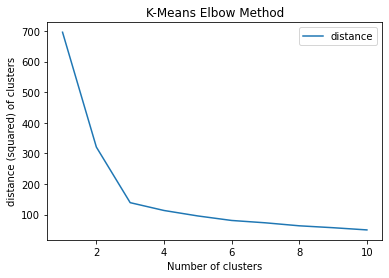

In [45]:
dist_df.set_index("number_of_clusters").plot()
plt.xlabel('Number of clusters')
plt.ylabel('distance (squared) of clusters')
plt.title('K-Means Elbow Method')